# Yelp Review Analysis

We will use the [Yelp Review Data Set from Kaggle](https://www.kaggle.com/yelp-dataset/yelp-dataset/version/4).

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business (Higher stars is better). In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users.

The "useful" and "funny" columns are similar to the "cool" column.

The goal of this project is to predict whether the customer will rate the business as GOOD, BAD or NEUTRAL.

We have information regarding the Stars that were allocated to a business by a user. Using this, we will create a new attribute that is CUSTOMER EXP which will categorize stars 1 as BAD experience, stars 2 & 3 as NEUTRAL and stars 4 & 5 as GOOD experience.

We will use Word clouds to obtain better infographic content of all the reviews.

## Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
%matplotlib inline
from wordcloud.wordcloud import WordCloud, STOPWORDS
from PIL import Image

## Loading the data and interpreting it

In [3]:
yelp = pd.read_csv("C:\\Users\\Kush\\Desktop\\Applied Project\\Yelp\\yelp.csv")
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [5]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


## Creating features

Here we create the Customer Experience column where we categorize the Stars given by customers to different business as GOOD, BAD and NEUTRAL.

Also, we create a new feature that is Text Length that gives the length of the reviews. This feature will give us an understanding of customer behavior and their experience.

In [6]:
Cust = []
for i in yelp['stars']:
    if i==1:
        Cust.append('BAD')
    elif i==2 | i==3:
        Cust.append('NEUTRAL')
    else:
        Cust.append('GOOD')
        
yelp['Customer EXP'] = Cust
yelp['Customer EXP'].value_counts()
yelp['Text Length'] = yelp['text'].apply(lambda x: len(x.split()))
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,Customer EXP,Text Length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,GOOD,155
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,GOOD,257
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,GOOD,16
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,GOOD,76
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,GOOD,86


## Exploratory data analysis

C:\Users\Kush\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Kush\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Kush\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Customer EXP
BAD        153.953271
GOOD       127.021951
NEUTRAL    140.714579
Name: Text Length, dtype: float64

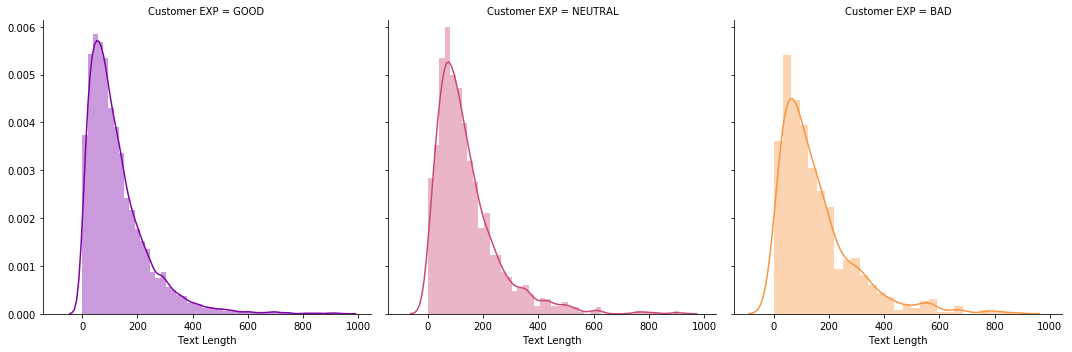

In [7]:
a = sns.FacetGrid(data=yelp, col='Customer EXP', hue='Customer EXP', palette='plasma', size=5)
a.map(sns.distplot, "Text Length")
yelp.groupby('Customer EXP').mean()['Text Length']

From the above histogram plots for all 3 categories of 'Customer EXP', we can conclude that people having GOOD experience wound up writing around 100 words while people having BAD or NEUTRAL experience ended up writing slightly more at around 200 words.

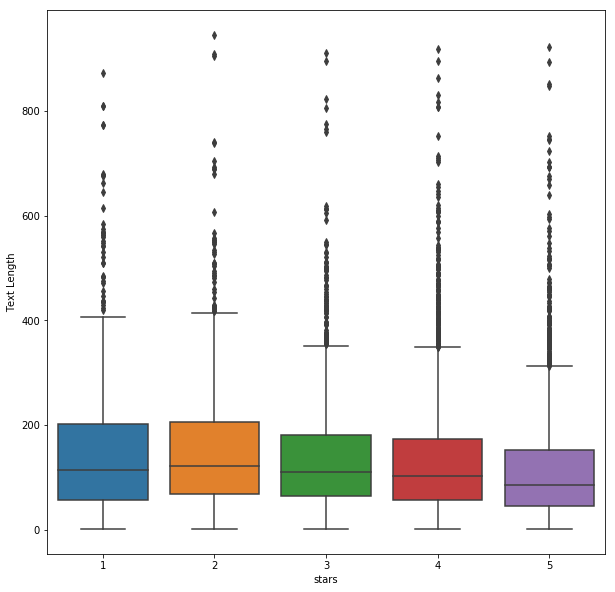

In [8]:
plt.figure(figsize=(10,10))
sns.boxplot(x='stars', y='Text Length', data=yelp)

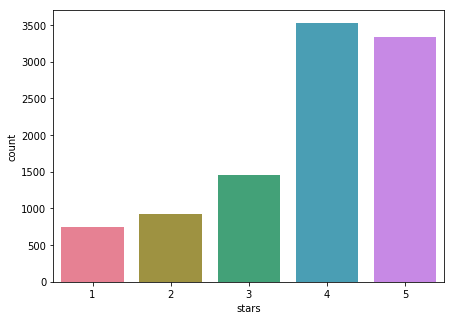

In [9]:
plt.figure(figsize = (7,5))
sns.countplot('stars', data = yelp, palette="husl")

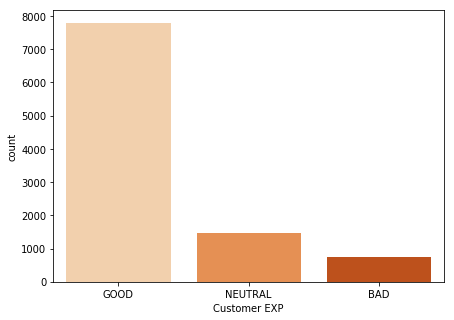

In [10]:
plt.figure(figsize = (7,5))
sns.countplot('Customer EXP', data = yelp, palette="Oranges")

Lets find the Correlation between COOL, USEFUL, FUNNY and TEXTLENGTH features from the data set when we group it by STARS.

In [11]:
yelp.groupby('Customer EXP').mean().corr()

,stars,cool,useful,funny,Text Length
stars,1.000000,0.999875,-0.748135,-0.950064,-0.987979
cool,0.999875,1.000000,-0.737555,-0.945014,-0.990299
useful,-0.748135,-0.737555,1.000000,0.917839,0.636565
funny,-0.950064,-0.945014,0.917839,1.000000,0.890403
Text Length,-0.987979,-0.990299,0.636565,0.890403,1.000000


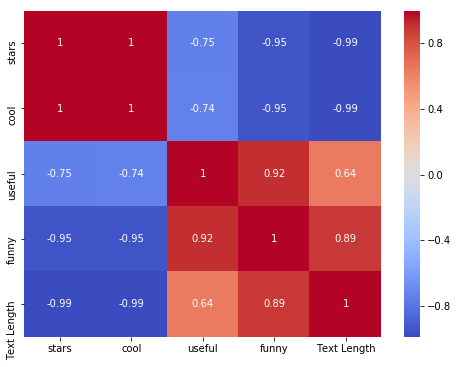

In [12]:
plt.figure(figsize = (8,6))
sns.heatmap(yelp.groupby('Customer EXP').mean().corr(), cmap = "coolwarm", annot=True)

## Classification algorithms for our prediction

### Splitting the data

In [13]:
x = yelp['text']
y = yelp['Customer EXP']
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 101)

## Engineering a Text cleaning function to remove the Punctuations and Stopwords from the data

In [14]:
from nltk.corpus import stopwords
def text_clean(message):
    nopunc = [i for i in message if i not in string.punctuation]
    nn = "".join(nopunc)
    nn = nn.lower().split()
    nostop = [word for word in nn if word not in stopwords.words('english')]
    return(nostop)

In [15]:
good = yelp[yelp['Customer EXP'] == 'GOOD']
bad = yelp[yelp['Customer EXP'] == 'BAD']
neu = yelp[yelp['Customer EXP'] == 'NEUTRAL']

## Cleaning the Review for BAD, NEUTRAL and GOOD by removing the stopwords and Punctuations

In [16]:
good_bow = text_clean(good['text'])

In [17]:
bad_bow = text_clean(bad['text'])

In [18]:
neu_bow = text_clean(neu['text'])

In [19]:
good_para = ' '.join(good_bow)
bad_para = ' '.join(bad_bow)
new_para = ' '.join(neu_bow)

### Word cloud to display the most common words in the Reviews where customer experience was GOOD

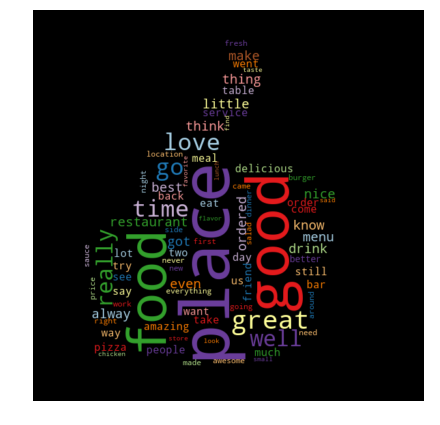

<Figure size 720x576 with 0 Axes>

In [20]:
stopwords = set(STOPWORDS)
stopwords.add('one')
stopwords.add('also')
mask_image = np.array(Image.open("C:\\Users\\Kush\\Desktop\\Applied Project\\Yelp\\thumbsup.jpg"))
wordcloud_good = WordCloud(colormap = "Paired",mask = mask_image, width = 300, height = 200, scale=2,max_words=1000, stopwords=stopwords).generate(good_para)
plt.figure(figsize = (7,10))
plt.imshow(wordcloud_good, interpolation="bilinear", cmap = plt.cm.autumn)
plt.axis('off')
plt.figure(figsize = (10,8))
plt.show()
wordcloud_good.to_file("good.png")

## Word cloud to display the most common words in the Reviews where customer experience was BAD

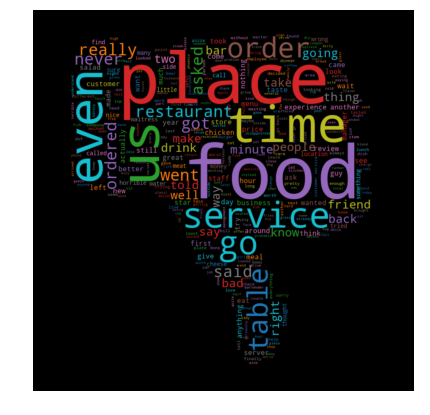

In [21]:
stopwords = set(STOPWORDS)
stopwords.add('one')
stopwords.add('also')
stopwords.add('good')
mask_image1 = np.array(Image.open("C:\\Users\\Kush\\Desktop\\Applied Project\\Yelp\\thumbsdown.jpg"))
wordcloud_bad = WordCloud(colormap = 'tab10', mask = mask_image1, width = 300, height = 200, scale=2,max_words=10000, stopwords=stopwords).generate(bad_para)
plt.figure(figsize = (10,7))
plt.imshow(wordcloud_bad,interpolation='bilinear',cmap = plt.cm.autumn)
plt.axis('off')
plt.show()
wordcloud_bad.to_file('bad.png')

## Word cloud to display the most common words in the Reviews where customer experience was NEUTRAL

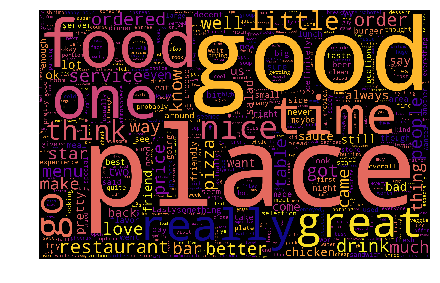

In [22]:
stopwords = set(STOPWORDS)
wordcloud_neu = WordCloud(colormap = "plasma", width = 1100, height = 700, scale=2,max_words=500, stopwords=stopwords).generate(new_para)
plt.figure(figsize = (7,10))
plt.imshow(wordcloud_neu,cmap = plt.cm.autumn)
plt.axis('off')
plt.show()
wordcloud_neu.to_file('neu.png')

### Observations from the Word Cloud

1. The customers which reviewed a business to be *GOOD* used words such as *GOOD*, *TIME*, *FOOD*, *LOVE*, *PLACE*.
2. The businesses which where reviewed to be *NEUTRAL* had words such as *FOOD, REALLY, PLACE, ORDERED, WELL, NICE*
3. The customers which reviewed a business to be *BAD* i.e. Stars = 1 used words such as *TABLE, TIME, ORDER, SERVICE, EVEN, BETTER*

From these observations, we find that there are a lot of unique words in our reviews which can turn up as good classifiers for a business. These words can be used as independent variables to classfify the reviews and customer experience as GOOD, BAD or NEUTRAL.

## Let's use Naive Bayes Classifier and Support Vector machines to classify customer experience

In [23]:
# Converting words into vector
from sklearn.feature_extraction.text import CountVectorizer
cv_transformer = CountVectorizer(analyzer = text_clean)

In [25]:
from nltk.corpus import stopwords
x = cv_transformer.fit_transform(x)

In [26]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 101)

In [27]:
# Naive Bayes
from sklearn.naive_bayes import MultinomialNB

In [28]:
nb = MultinomialNB()
nb.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [31]:
predictions = nb.predict(x_test)
predictions

array(['GOOD', 'GOOD', 'GOOD', ..., 'GOOD', 'GOOD', 'GOOD'], dtype='<U7')

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
print(confusion_matrix(y_test, predictions))
print("\n")
print(classification_report(y_test, predictions))

[[  40  173    7]
 [  15 2276   46]
 [   4  419   20]]


             precision    recall  f1-score   support

        BAD       0.68      0.18      0.29       220
       GOOD       0.79      0.97      0.87      2337
    NEUTRAL       0.27      0.05      0.08       443

avg / total       0.71      0.78      0.71      3000



 We find that the Naive Bayes predictor performs pretty well! It helps us recognize 71% of our test data correctly.